In [10]:
from textwrap import wrap
import re
import itertools
import tfplot
import matplotlib
import numpy as np

from sklearn.metrics import confusion_matrix

import csv

def get_labels(file_loc):
    class_map =  {}
    with open(file_loc,"r") as f:
        next(f)  # skip header
        reader = csv.reader(f)
        for row in reader:
            class_map[int(row[0])] = row[2]
    return class_map


def plot_confusion_matrix(correct_labels, predict_labels, labels, title='Confusion matrix', tensor_name = 'MyFigure/image', normalize=False):
    ''' 
    Parameters:
        correct_labels                  : These are your true classification categories.
        predict_labels                  : These are you predicted classification categories
        labels                          : This is a lit of labels which will be used to display the axix labels
        title='Confusion matrix'        : Title for your matrix
        tensor_name = 'MyFigure/image'  : Name for the output summay tensor

    Returns:
        summary: TensorFlow summary 

    Other itema to note:
        - Depending on the number of category and the data , you may have to modify the figzie, font sizes etc. 
        - Currently, some of the ticks dont line up due to rotations.
    '''

    cm = confusion_matrix(correct_labels, predict_labels, labels=labels)
    if normalize:
        cm = cm.astype('float')*10 / cm.sum(axis=1)[:, np.newaxis]
        cm = np.nan_to_num(cm, copy=True)
        cm = cm.astype('int')

    np.set_printoptions(precision=2)
    ###fig, ax = matplotlib.figure.Figure()

    fig = matplotlib.figure.Figure(figsize=(7, 7), dpi=320, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(1, 1, 1)
    im = ax.imshow(cm, cmap='Oranges')

    classes = [re.sub(r'([a-z](?=[A-Z])|[A-Z](?=[A-Z][a-z]))', r'\1 ', x) for x in labels]
    classes = ['\n'.join(wrap(l, 40)) for l in classes]

    tick_marks = np.arange(len(classes))

    ax.set_xlabel('Predicted', fontsize=7)
    ax.set_xticks(tick_marks)
    c = ax.set_xticklabels(classes, fontsize=4, rotation=-90,  ha='center')
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    ax.set_ylabel('True Label', fontsize=7)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes, fontsize=4, va ='center')
    ax.yaxis.set_label_position('left')
    ax.yaxis.tick_left()

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], 'd') if cm[i,j]!=0 else '.', horizontalalignment="center", fontsize=6, verticalalignment='center', color= "black")
    fig.set_tight_layout(True)
    summary = tfplot.figure.to_summary(fig, tag=tensor_name)
    return fig #summary

In [13]:
# hk test
correct_labels = ["a","b","c"]
predict_labels = ["a","b","b"]
labels = ["a","b","c"]

mycm = plot_confusion_matrix(correct_labels, predict_labels, labels, title='Confusion matrix', tensor_name = 'MyFigure/image', normalize=False)



/home/hugo/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


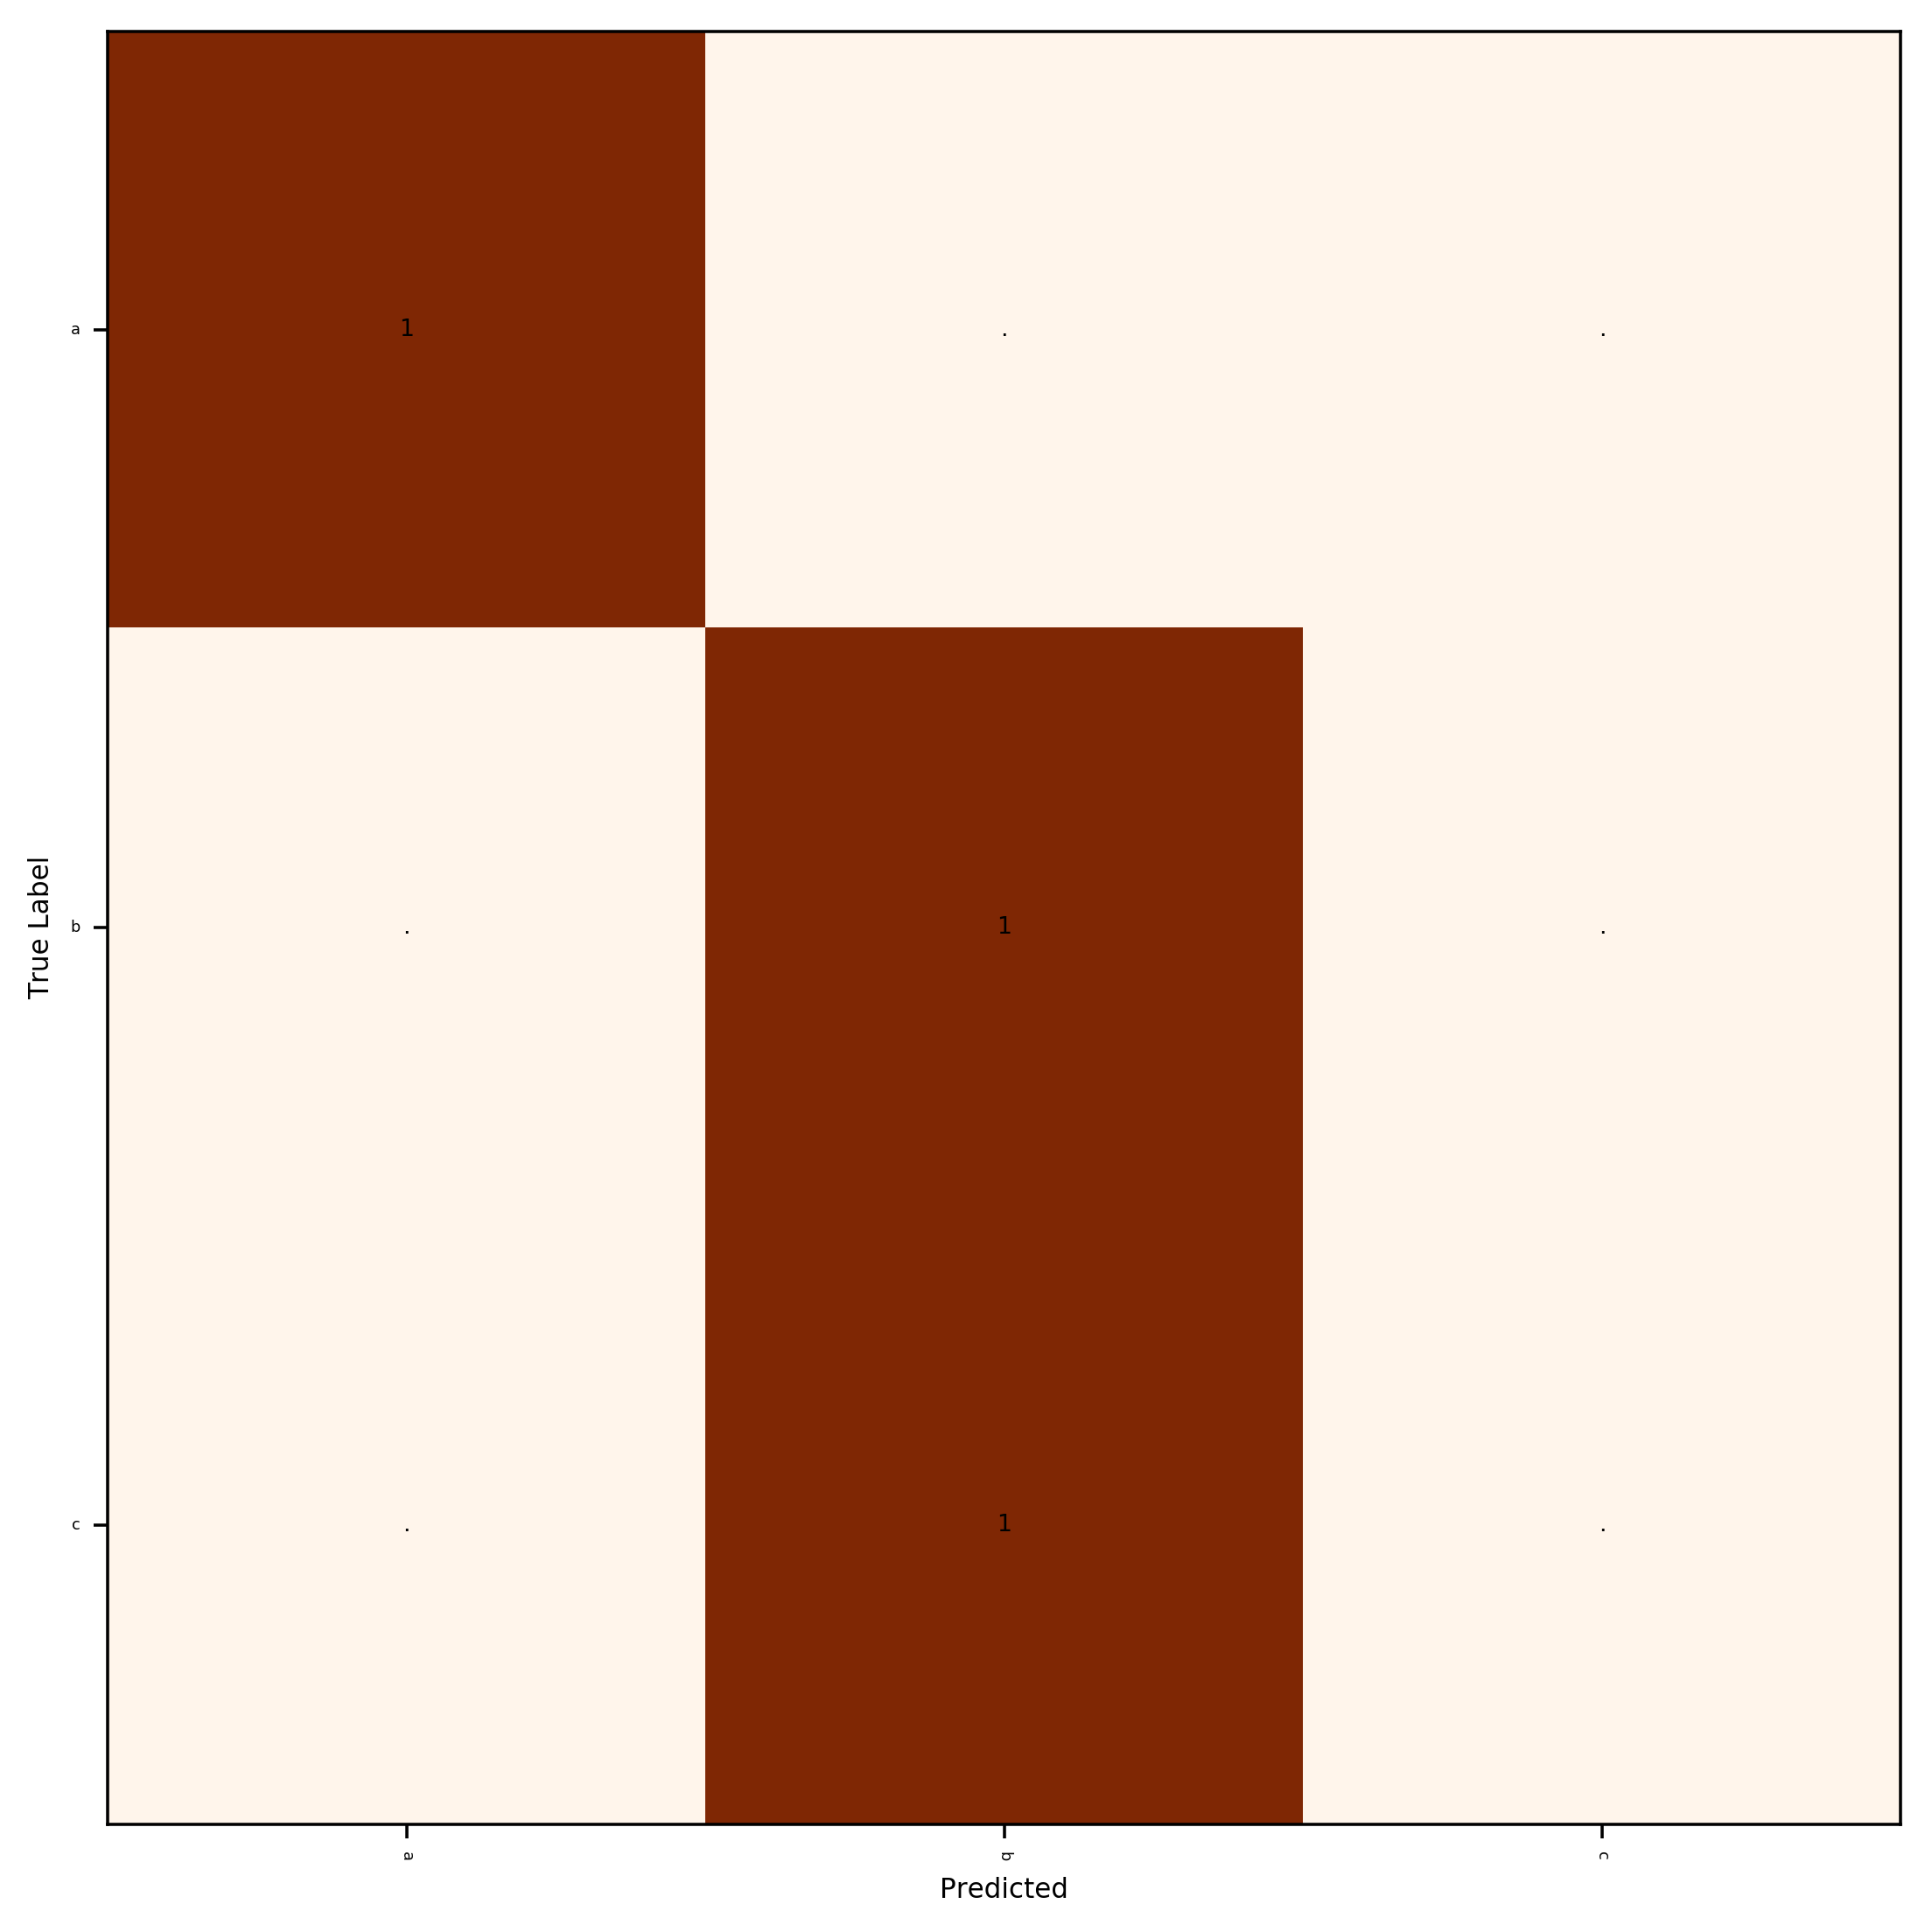

In [14]:
%matplotlib inline  

mycm